# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_pose_estimation_model_training.py are installed
# in your environment or in the same file pathway. 
import functions_pose_estimation_model_training

2024-05-01 20:28:59.734874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-01 20:28:59.734921: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# INPUTTING PARAMETERS

In [2]:
"""
DESCRIPTION:
The experimenter must create the dictionary that contains the information of which blocks from which dates will be used 
to train the movement onset-offset detector.
"""

# EXPERIMENTER INPUTS:

# Initializing the date and block dictionary that contains the dates and blocks that will be used to train the movement 
# detection models.
date_block_dict = {}

# Defining the date and block dictionary.
date_block_dict['2023_01_05'] = ['Block1', 'Block2', 'Block3']
date_block_dict['2023_01_06'] = ['Block1', 'Block2', 'Block3']

dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
fps               = 30
patient_id        = 'CC01'
task              = 'Speller' 

"""
EXPERIMENTER INPUTS:
date_block_dict:   [dictionary (key: string (YYYY_MM_DD); value: list > strings (block IDs)]; The keys and vlaues of the
                   dictionary correspond to dates and block IDs respectively that will be used to train the movement 
                   onset and offset detector.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
fps:               [int (30 or 60)]; Frames per second of of the video feed. Note that 30 FPS was from Aug 2022 - Jan
                   2023.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

# UPLOADING DATA

In [3]:
"""
DESCRIPTION:
Uploading the click, hand trajectories and movement onsets and offsets from each experimenter-input block in the 
date_block_dict.

INPUT VARIABLES:
date_block_dict:   [dictionary (key: string (YYYY_MM_DD); value: list > strings (block IDs)]; The keys and vlaues of the
                   dictionary correspond to dates and block IDs respectively that will be used to train the movement
                   onset and offset detector.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

NECESSARY FUNCTIONS:
load_click_information
load_hand_trajectories
load_movement_onsetsoffsets

OUTPUT VARIABLES:
data_dict:         [dictionary (key: string (date+block ID); value: below)];
    click_info:    [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
        data:      [xarray (time samples,) > strings]; For each time sample of the array of each key there is a 
                   'no_click' string or a click-string specific to that xarray. For example, the 'backspace' key of the
                   dictionary has an array where each element is a string named either 'no_click' or 'backspace_click'.
                   The 'backspace_click' elements do not occur consecutively and describe the instance a click on the 
                   backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension
                   is in units of s.
        plotcolor: [string]; Color corresponding to the type of click for plotting.
    onsetsoffsets: [list > list [t_onset, t_offset] > floats (units: s)]; The dictionary containing all movement onset 
                   and offset times for each movement type.
    trajectories:  [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each
                   landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Uploading click, hand trajectory and movement onset/offset info.
data_dict = functions_pose_estimation_model_training.data_upload(date_block_dict, dir_intermediates, patient_id, task)



HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',
 'THUMB_TIP_x',
 'THUMB_TIP_y',
 'INDEX_FINGER_MCP_x',
 'INDEX_FINGER_MCP_y',
 'INDEX_FINGER_PIP_x',
 'INDEX_FINGER_PIP_y',
 'INDEX_FINGER_DIP_x',
 'INDEX_FINGER_DIP_y',
 'INDEX_FINGER_TIP_x',
 'INDEX_FINGER_TIP_y',
 'MIDDLE_FINGER_MCP_x',
 'MIDDLE_FINGER_MCP_y',
 'MIDDLE_FINGER_PIP_x',
 'MIDDLE_FINGER_PIP_y',
 'MIDDLE_FINGER_DIP_x',
 'MIDDLE_FINGER_DIP_y',
 'MIDDLE_FINGER_TIP_x',
 'MIDDLE_FINGER_TIP_y',
 'RING_FINGER_MCP_x',
 'RING_FINGER_MCP_y',
 'RING_FINGER_PIP_x',
 'RING_FINGER_PIP_y',
 'RING_FINGER_DIP_x',
 'RING_FINGER_DIP_y',
 'RING_FINGER_TIP_x',
 'RING_FINGER_TIP_y',
 'PINKY_MCP_x',
 'PINKY_MCP_y',
 'PINKY_PIP_x',
 'PINKY_PIP_y',
 'PINKY_DIP_x',
 'PINKY_DIP_y',
 'PINKY_TIP_x',
 'PINKY_TIP_y']

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',
 'THUMB_

# PLOTTING UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

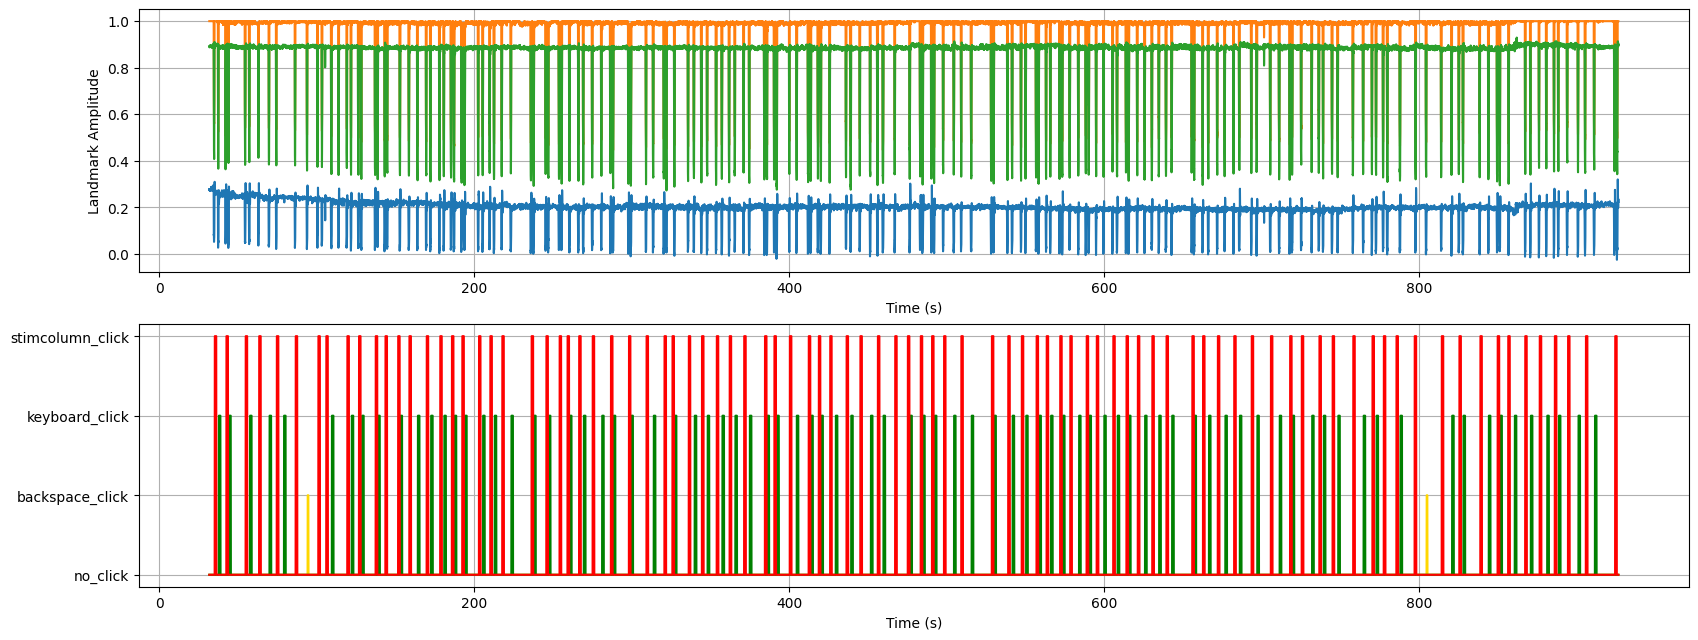

In [4]:
"""
DESCRIPTION:
Plotting the experimenter-specified hand landmarks and the click information across the entirety of experimenter-
specified date and block.
"""

# EXPERIMENTER INPUTS:
block_id          = 'Block1'
date              = '2023_01_06'
landmark_plotting = ['MIDDLE_FINGER_TIP_x', 'MIDDLE_FINGER_TIP_y', 'RING_FINGER_TIP_y']

"""    
INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task whose click, hand trajectory and movement
                   onsets and offsets will be plotted.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
data_dict:         [dictionary (key: string (date+block ID); value: dictionary (key/value pairs below))];
    click_info:    [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
        data:      [xarray (time samples,) > strings]; For each time sample of the array of each key there is a 
                   'no_click' string or a click-string specific to that xarray. For example, the 'backspace' key of the
                   dictionary has an array where each element is a string named either 'no_click' or 'backspace_click'.
                   The 'backspace_click' elements do not occur consecutively and describe the instance a click on the 
                   backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension
                   is in units of s.
        plotcolor: [string]; Color corresponding to the type of click for plotting.
    onsetsoffsets: [list > list [t_onset, t_offset] > floats (units: s)]; The dictionary containing all movement onset
                   and offset times for each movement type.
    trajectories:  [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each
                   landmark. The time domain is in units of seconds. 
landmark_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_pose_estimation_model_training.plotting_landmarks_and_clicks(block_id, date, data_dict, landmark_plotting)




# REFERENCING HAND TRAJECTORY DATA TO PINKY AND THUMB LANDMARKS

In [5]:
"""
DESCRIPTION:
Each hand landmark is referenced according to experimenter-specified landmarks. Make sure that the landmarks that are
selected will not be used for further analysis as they will get normalized out to 0.
"""

# EXPERIMENTER INPUT:
ref1_x = 'PINKY_MCP_x'
ref2_x = 'THUMB_MCP_x'
refa_y = 'THUMB_MCP_y'
refb_y = 'THUMB_TIP_y'

"""
INPUT VARIABLES:
data_dict:         [dictionary (key: string (date+block ID); value: dictionary (relevant key/value pairs below))];
    trajectories:  [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each
                   landmark. The time domain is in units of seconds. 
ref1_x:            [string]; First horizontal reference landmark
ref2_x:            [string]; Second horizontal reference landmark
refa_y:            [string]; First vertical reference landmark
refb_y:            [string]; Second vertical reference landmark

OUTPUT VARIABLES:
data_dict:         [dictionary (key: string (date+block ID); value: dictionary (relevant key/value pairs below))];
    trajectories:  [xarray (landmarks, time samples) > floats]; The trajectories of the x- and y-coordinates for each
                   landmark. These are referenced in the x- and y-dimensions according to the reference landmarks. The
                   time domain is in units of seconds. 
"""

# COMPUTATION:

# Normalizing hand trajectories.
data_dict = functions_pose_estimation_model_training.referencing_hand_trajectories(data_dict, ref1_x, ref2_x, refa_y,\
                                                                                   refb_y)


# EXTRACTING ONLY RELEVANT TRAJECTORIES

In [6]:
"""
DESCRIPTION:
For each movement type, the experimenter enters the most relevant hand landmarks for training. The experimenter creates
a relevant_hand_landmarks dictionary where the keys of the dictionary are the possible movement classes and the value 
for each key is a list of the most relevant hand landmarks to that class. The plotting cells above should be used to 
determine these landmarks. Then for each movement type a dictionary, hand_trajectories_relevant is created where for 
each movement, only the relevant hand trajectories are stored.
"""

# EXPERIMENTER INPUTS:
relevant_landmarks = {
                      'grasp': ['MIDDLE_FINGER_MCP_x',\
                                'MIDDLE_FINGER_MCP_y',\
                                'MIDDLE_FINGER_PIP_x',\
                                'MIDDLE_FINGER_PIP_y',\
                                'MIDDLE_FINGER_DIP_x',\
                                'MIDDLE_FINGER_DIP_y',\
                                'MIDDLE_FINGER_TIP_x',\
                                'MIDDLE_FINGER_TIP_y',\
                                'RING_FINGER_MCP_x',\
                                'RING_FINGER_MCP_y',\
                                'RING_FINGER_PIP_x',\
                                'RING_FINGER_PIP_y',\
                                'RING_FINGER_DIP_x',\
                                'RING_FINGER_DIP_y',\
                                'RING_FINGER_TIP_x',\
                                'RING_FINGER_TIP_y']
                      }

"""
INPUT VARIABLES:
data_dict:          [dictionary (key: string (date+block ID); value: dictionary (key/value pairs below))];
    click_info:     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
        data:       [xarray (time samples,) > strings]; For each time sample of the array of each key there is a 
                    'no_click' string or a click-string specific to that xarray. For example, the 'backspace' key of the
                    dictionary has an array where each element is a string named either 'no_click' or 'backspace_click'.
                    The 'backspace_click' elements do not occur consecutively and describe the instance a click on the 
                    backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension
                    is in units of s.
        plotcolor:  [string]; Color corresponding to the type of click for plotting.
    onsetsoffsets:  [list > list [t_onset, t_offset] > floats (units: s)]; The dictionary containing all movement onset
                    and offset times for each movement type.
    trajectories:   [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each
                    landmark. The time domain is in units of seconds. 
relevant_landmarks: [dictionary (key: string (movement type); Value: list > strings (hand landmarks))]; Each key 
                    corresponds to a list of the most useful landmarks used to detect the movement type.
                         
OUTPUT VARIABLES:
data_dict: Same as above with the additional key/value pair:
    trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks, time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
"""

# COMPUTATION:

# Extracting only the relevant hand trajectories for each movement.
data_dict = functions_pose_estimation_model_training.extracting_relevant_trajectories(data_dict, relevant_landmarks)


# ZOOMING IN

Movement:  grasp

Movement Onset Times:  [905.0]
Movement Onset Inds:  [172]

Movement Offset Times:  [905.6333333333333]
Movement Offset Inds:  [172]


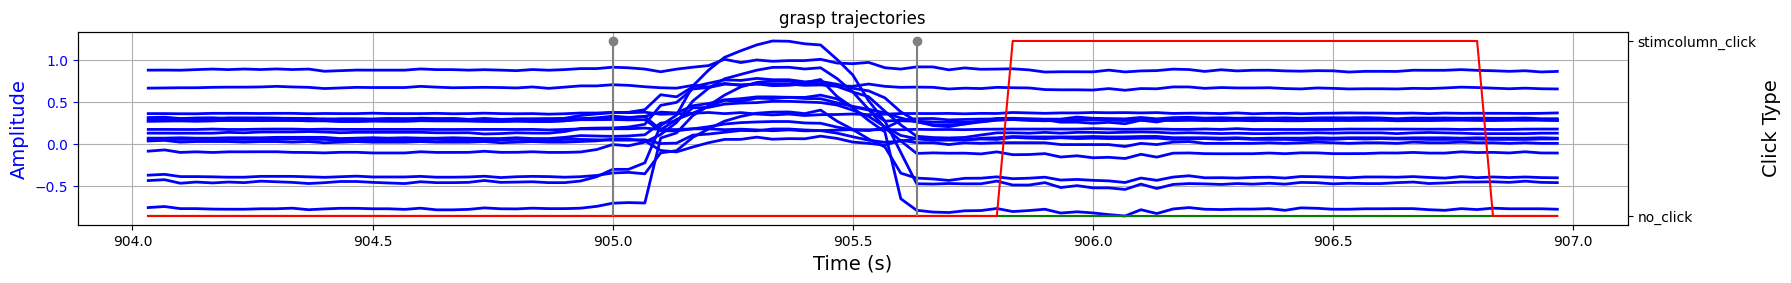

In [7]:
"""
DESCRIPTION:
The experimenter inputs a start and an end time between which to zoom in to view the relevant hand trajectories for each
movement and click information for a specific date+block pair. The hand landmark trajectories are shown for each
movement in a separate plot.
"""
# EXPERIMENTER INPUTS:
block_id        = 'Block1'
date            = '2023_01_06'
movement_colors = {'grasp': 'blue'}
t_start_zoom    = 904
t_end_zoom      = 907

"""
INPUT VARIABLES:
block_id:                  [String (BlockX, where X is an int))]; Block ID of the task whose click, hand trajectory and
                           movement onset and offset will be plotted.
date:                      [string (YYYY_MM_DD)]; Date on which the block was run.
data_dict:                 [dictionary (key: string (date+block ID); value: dictionary (key/value pairs below))];
    click_info:            [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
        data:              [xarray (time samples,) > strings]; For each time sample of the array of each key there is a 
                           'no_click' string or a click-string specific to that xarray. For example, the 'backspace' key
                           of the dictionary has an array where each element is a string named either 'no_click' or 
                           'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the
                           instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys,
                           similar rules apply. Time dimension is in units of s.
        plotcolor:         [string]; Color corresponding to the type of click for plotting.
    onsetsoffsets:         [list > list [t_onset, t_offset] > floats (units: s)]; The dictionary containing all movement
                           onset and offset times for each movement type.
    trajectories:          [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for
                           each landmark. The time domain is in units of seconds. 
    trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks, time samples)
                           > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                           dimension of each xarray is in units of s.              
movement_colors:           [dictionary (key: string (movement); Value: string (color))]; There is a color associated
                           with each movement for plotting.
t_end_zoom:                [int (units: s)]; The ending time point for the zoomed in window. To set as the last time
                           point, leave as empty list [].
t_start_zoom:              [int (units: s)]; The starting time point for the zoomed in window. To set as the first time
                           point, leave as empty list [].    
"""

# COMPUTATION:

# Zoomed-in visualization on specific date and block.
functions_pose_estimation_model_training.zooming_in(block_id, date, data_dict, movement_colors, t_end_zoom,\
                                                    t_start_zoom)


# LABELING EACH TIME SAMPLE

In [8]:
"""
DESCRIPTION:
Labeling each video frame across all blocks according to the experimenter-specified attempted movement onsets and 
offsets.

Note: Instead of date+block ID, the nomenclature will switch to task ID in the output.

INPUT VARIABLES:
data_dict:         [dictionary (key: string (date+block ID); value: dictionary (relevant key/value pairs below))];
    onsetsoffsets: [list > list [t_onset, t_offset] > floats (units: s)]; The dictionary containing all movement onset
                   and offset times for each movement type.
    trajectories:  [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   landmark. The time domain is in units of seconds. 

OUTPUT VARIABLES:
labels_dict: [dictionary (Key: string (task ID); Value: xarray (times samples,) > strings (labels))]; For each time 
             frame in each task, there exists a rest or movement-type label depending on the experimenter-specified 
             onset and  offset of attempted movements.
"""

# COMPUTATION:

# Assigning labels.
labels_dict = functions_pose_estimation_model_training.creating_labels(data_dict)


# CREATING FEATURES USING TIME HISTORY

In [9]:
"""
Based on the experimenter-specified time history (t_history) the number of historical time points are calculated. An
xarray with dimensions (history, features, time) is created, where each coordinate in the history dimension represents
how much the features were shifted in time. For example, consider one coordinate in the feature array, and suppose a
time length of 10 samples and a total time history of 3 samples. For this feature, the resulting xarray would look like:

historical time shifts
     n=2 shifts      [[0.000, 0.000, 0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101],
     n=1 shift        [0.000, 0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521],
     n=0 shifts       [0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521, 0.882]]
                        t=0    t=1    t=2    t=3    t=4    t=5    t=6    t=7    t=8    t=9     (time samples)   

and the resulting dimensions of this array are (history=3, features=1, time=10).

Note: Instead of date+block ID, the nomenclature will switch to task ID in the output.
"""
# EXPERIMENTER INPUTS:
t_history = 1000

"""
INPUT VARIABLES:
data_dict:         [dictionary (key: string (date+block ID); value: dictionary (relevant key/value pairs below))];
    trajectories:  [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   landmark. The time domain is in units of seconds. 
fps:               [int (30 or 60)]; Frames per second of of the video feed.
t_history:         [float (unit: s)]; Amount of time history used as features.

NECESSARY FUNCTIONS:
concatenating_historical_features

OUTPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, time samples) > floats)]; 
               Array of historical time features.
"""

# Creating feature array historical time shifts.
features_dict = functions_pose_estimation_model_training.creating_features(data_dict, fps, t_history)


# ADJUSTING FEATURES AND LABELS TIME DIMENSION 

In [10]:
"""
DESCRIPTION:
Adjusting the time dimension of the labels and features. Due to the time history, the time-shifted rows of the features
arrays are zero padded. As such, all columns with leading zeros should be removed. If there are N time shfited columns,
this means that N-1 columns should be removed. For example, consider N = 3:

Features array:

historical time shifts
    n=2 shifts      [[0.000, 0.000, 0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101],
    n=1 shift        [0.000, 0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521],
    n=0 shifts       [0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521, 0.882]]
                        t=0    t=1    t=2    t=3    t=4    t=5    t=6    t=7    t=8    t=9     (time samples)   

    Labels:             l0     l1     l2     l3     l4     l5     l6     l7     l8     l9

After curtailing, the features and labels arrays would look like:

historical time shifts
    n=2 shifts      [[0.234, 0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101],
    n=1 shift        [0.523. 0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521],
    n=0 shifts       [0.435, 0.982, 0.175, 0.759, 0.341, 0.101, 0.521, 0.882]]
                        t=2    t=3    t=4    t=5    t=6    t=7    t=8    t=9     (time samples)   

    Labels:             l2     l3     l4     l5     l6     l7     l8     l9

where time points and labels will then be re-adjusted.

INPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, time samples) > floats)]; 
               Array of historical time features.
fps:           [int (30 or 60)]; Frames per second of of the video feed.
labels_dict:   [dictionary (Key: string (task ID); Value: xarray (time samples,) > strings (labels))]; For each time
               frame in each block, there exists a rest or movement-type label depending on the experimenter-specified
               onset and offset of attempted movements.
t_history:     [float (unit: s)]; Amount of feature time history.

OUTPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, time samples) > floats)]; 
               Array of historical time features. Number of time samples corresponding to time history are curtailed at
               the beginning of the time array.
labels_dict:   [dictionary (Key: string (task ID); Value: xarray (time samples,)> strings (labels))]; For each time 
               frame in each task, there exists a rest or movement-type label depending on the experimenter-specified 
               onset and offset of attempted movements. Number of time samples corresponding to time history are 
               curtailed at the beginning of the time array.

"""

# COMPUTATION:

# Adjusting the features and labels time dimensions to account for zero-padded features due to the historical features
# array. 
features_dict,\
labels_dict = functions_pose_estimation_model_training.time_history_sample_adjustment(features_dict, fps, labels_dict,\
                                                                                      t_history)


# EQUALIZING THE NUMBER OF SAMPLES FOR EACH CLASS

In [11]:
"""
DESCRIPTION:
According to the label array, it is unlikely that there are an equal number of samples per class. For whichever class 
there are the most samples, the indices of this class will be extracted to create a smaller subset of indices in number
equal to that of the underrepresented classes. For example, consider the following labels array:

labels:  ['rest', 'rest', 'rest', 'rest', 'rest, 'grasp', 'grasp', 'grasp', 'rest', 'rest', 'rest', 'rest']
indices:    0       1       2       3       4       5        6        7       8       9       10      11

In the example, there are 3 samples with grasp labels, while there are 9 samples with rest labels. The indices 
corresponding to the rest labels are: [0, 1, 2, 3, 4, 8, 9, 10, 11]. These indices will be randomly subsampled such that
they are equal in number to the indices in the grasp class. For example: [0, 1, 2] or [1, 4, 10] or [3, 9, 11]. As such
the downsampled labels (and corresponding features) will use the indices:

labels downsampled:  ['rest', 'grasp', 'grasp', 'grasp', 'rest', 'rest']
indices downsampled:    3        5        6        7       9       11

INPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, time samples) > floats)]; 
               Array of historical time features. Number of time samples corresponding to time history are curtailed at
               the beginning of the time array.
labels_dict:   [dictionary (Key: string (task ID); Value: xarray (time samples,)> strings (labels))]; For each time 
               frame in each task, there exists a rest or movement-type label depending on the experimenter-specified 
               onset and offset of attempted movements. Number of time samples corresponding to time history are 
               curtailed at the beginning of the time array.

NECESSARY FUNCTIONS:
index_advancer
    
OUTPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, samples) > floats)]; Array of 
               historical time features. Time samples reduced such that there are an equal number of features per class.
labels_dict:   [dictionary (Key: string (task ID); Value: xarray (samples,)> strings (labels))]; For each sample in each
               task, there exists a rest or movement-type label depending on the experimenter-specified onset and
               offset of attempted movements. Time samples reduced such that there are an equal number of features per
               class.
"""

# COMPUTATION:

# Downsampling the labels and corresponding features of the overrepresented classes.
features_dict,\
labels_dict = functions_pose_estimation_model_training.equalizing_samples_per_class(features_dict, labels_dict)


task0
task1
task2
task3
task4
task5


# SPLITTING TASKS FOR TRAINING OR VALIDATION PER-FOLD

In [12]:
"""
DESCRIPTION:
Creating dictionaries of training and validation folds where the tasks are split up per-fold.

INPUT VARIABLES:
features_dict: [dictionary (Key: string (task ID); Value: xarray (time history, features, samples) > floats)]; Array of 
               historical time features. Time samples reduced such that there are an equal number of features per class.

OUTPUT VARIABLES:
train_folds_tasks  [dict (key: string (fold ID); Value: list > strings (task IDs))]; List of all the training tasks for 
                   each training fold.
valid_folds_tasks: [dict (key: string (fold ID); Value: list > strings (task IDs))]; List of all the validation tasks
                   for each validation fold.
"""

# COMPUTATION:

# Splitting up the tasks into training and validation tasks per-fold.
train_folds_tasks,\
valid_folds_tasks = functions_pose_estimation_model_training.training_validation_split_tasks(features_dict)


In [13]:
valid_folds_tasks

{'fold0': ['task0'],
 'fold1': ['task1'],
 'fold2': ['task2'],
 'fold3': ['task3'],
 'fold4': ['task4'],
 'fold5': ['task5']}

In [14]:
train_folds_tasks

{'fold0': ['task1', 'task2', 'task3', 'task4', 'task5'],
 'fold1': ['task0', 'task2', 'task3', 'task4', 'task5'],
 'fold2': ['task0', 'task1', 'task3', 'task4', 'task5'],
 'fold3': ['task0', 'task1', 'task2', 'task4', 'task5'],
 'fold4': ['task0', 'task1', 'task2', 'task3', 'task5'],
 'fold5': ['task0', 'task1', 'task2', 'task3', 'task4']}

# TRAIN/VALIDATION SPLIT DATA AND LABELS

In [15]:
"""
DESCRIPTION:
Splitting the data into training and validation blocks for building the fold-models. The validation folds will be tested
on the models built on the corresponding training folds to confirm that the decoder is generalizable to unseen data. 

INPUT VARIABLES:
features_dict:     [dictionary (Key: string (task ID); Value: xarray (time history, features, samples) > floats)]; Array
                   of historical time features. Time samples reduced such that there are an equal number of features per
                   class.
labels_dict:       [dictionary (Key: string (task ID); Value: xarray (samples,)> strings (labels))]; For each sample in
                   each task, there exists a rest or movement-type label depending on the experimenter- specified onset
                   and offset of attempted movements. Time samples reduced such that there are an equal number of 
                   features per class.
train_folds_tasks  [dict (key: string (fold ID); Value: list > strings (task IDs))]; List of all the training tasks for 
                   each training fold.
valid_folds_tasks: [dict (key: string (fold ID); Value: list > strings (task IDs))]; List of all the validation tasks
                   for each validation fold.

OUTPUT VARIABLES:
train_data_folds:   [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each
                    training fold, feature xarrays are concatenated in the sample dimension.
train_labels_folds: [dict (key: string (fold ID); Value: xarray (samples,) > strings (labels))]; For each training fold,
                    label xarrays are concatenated in the sample dimension.
valid_data_folds:   [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each 
                    validation fold, feature xarrays are concatenated in the sample dimension.
valid_labels_folds: [dict (key: string (fold ID); Value: xarray (samples,) > strings (labels))]; For each validation
                    fold, label xarrays are concatenated in the sample dimension.
"""

# COMPUTATION:

# Splitting the training and validation data for multiple folds. 
train_data_folds,\
train_labels_folds,\
valid_data_folds,\
valid_labels_folds = functions_pose_estimation_model_training.training_validation_split(features_dict, labels_dict,\
                                                                                        train_folds_tasks,\
                                                                                        valid_folds_tasks)

# MEAN CENTERING THE DATA ACCORDING TO THE TRAINING FOLDS

In [16]:
"""
DESCRIPTION:
Computing the mean of the data in each training fold in the time dimension. Note that only the mean of the first 
historical time point is computed with the intent of only computing the PCs from the features from the first historical
time point. This mean will be repeated in an array for as many historical time features that there are. Also note that
the data in a specific training and validation fold pair is mean-centered to the data in that specific traininig fold. 

INPUT VARIABLES:
rain_data_folds:   [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each
                   training fold, feature xarrays are concatenated in the sample dimension.
valid_data_folds:  [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each 
                   validation fold, feature xarrays are concatenated in the sample dimension.

OUTPUT VARIABLES:
train_data_folds: [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each
                  training fold, feature xarrays are centered according to the corresponding training fold mean.
valid_data_folds: [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each 
                  validation fold, feature xarrays are centered according to the corresponding training fold mean.
"""

# COMPUTATION:
        
# Computing the means of the training folds.
train_data_fold_means = functions_pose_estimation_model_training.mean_compute_all_folds(train_data_folds)

# Centering the training and validation data folds according to the training data means.
train_data_folds = functions_pose_estimation_model_training.mean_centering_all_folds(train_data_folds,\
                                                                                     train_data_fold_means)
valid_data_folds = functions_pose_estimation_model_training.mean_centering_all_folds(valid_data_folds,\
                                                                                     train_data_fold_means)


# REDUCE DATA DIMENSIONALITY WITH PCA

In [17]:
"""
DESCRIPTION: 
Transforming the training and validation data into PC space for each fold. The eigenvectors for the PC transformation
are computed from the 0th point in time history. For example consider an array of dimensions (h x f x t) where h, f and 
t correspond to the historical time sequence, number of features and number of time samples, respectively. sing a 
historical time features of the last 1 second with 100 ms shifts, this means that h can be any integer from 0 to 9. The
PCs are computed from the 0th time history coordinate of the data array: (0 x f x t). This can be dimensionally reduced 
to an array of dimensions (f x t). The resulting PCs of dimensions (p x t) where p <= f are applied to the (f x t) array
at each historical time point. 

The number of eigenvectors are selected based on one of two experimenter-specified criteria:

1) Only keep the first eiggenvectors that that in total explain less than or equal variance to percent_var_thr
   ... or ... 
2) Only keep the first n_pc_thr eigenvectors.
"""

# EXPERIMENTER INPUTS:
n_pc_thr        = 'None'
percent_var_thr = 'None'

"""
INPUT VARIABLES:
n_pc_thr:         [int]; The number of principal components to which the user wishes to reduce the data set. Set to 
                  'None' if percent_var_thr is not 'None', or set to 'None' along with percent_var_thr if all of the 
                  variance will be used (no PC transform).
percent_var_thr:  [float]; The percent variance which the user wishes to capture with the principal components. Will 
                  compute the number of principal components which capture this explained variance as close as possible,
                  but will not surpass it. Set to 'None' if n_pc_thr is not 'None', or set to 'None' along with n_pc_thr
                  if all of the variance will be used (no PC transform).
train_data_folds: [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each
                  training fold, feature xarrays are centered according to the corresponding training fold mean.
valid_data_folds: [dict (key: string (fold ID); Value: xarray (time history, features, samples) > floats)]; For each 
                  validation fold, feature xarrays are centered according to the corresponding training fold mean.

NECESSARY FUNCTIONS:
computing_eigenvectors
pc_transform

OUTPUT VARIABLES: 
train_data_folds  [dict (Key: string (fold ID); Value: xarray (history, pc features, samples) > floats (units: 
                  PC units)]; Reduced dimensionality version of the training data arrays.
valid_data_folds: [dict (Key: string (fold ID); Value: xarray (history, pc features, time samples) > floats (units:
                  PC units)]; Reduced dimensionality version of the validation data arrays.
"""

# COMPUTATION:

# Computing the PC features of the training and validation data according to the eigenvectors of the training data.
train_data_folds,\
valid_data_folds = functions_pose_estimation_model_training.pc_transform_all_folds(n_pc_thr, percent_var_thr,\
                                                                                   train_data_folds, valid_data_folds)



NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100

NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100

NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100

NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100

NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100

NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100


# REARRANGING FEATURES BASED ON MODEL CHOICE

In [18]:
"""
DESCRIPTION:
Depending on the experimenter-specified model type the features array will be rearranged corresponding to the dimensions
required for model.fit() 
"""
# EXPERIMENTER INPUTS:
model_type = 'LSTM' 

"""
INPUT VARIABLES:
model_type:       [string ('SVM','LSTM')]; The model type that will be used to fit the data.
train_data_folds  [dict (Key: string (fold ID); Value: xarray (history, pc features, samples) > floats (units: 
                  PC units)]; Reduced dimensionality version of the training data arrays.
valid_data_folds: [dict (Key: string (fold ID); Value: xarray (history, pc features, time samples) > floats (units:
                  PC units)]; Reduced dimensionality version of the validation data arrays.

NECESSARY FUNCTIONS:
rearranging_features
    
OUTPUT VARIABLES:
train_data_folds: [dictionary (key: string (fold ID): Value: xarray (samples, history, features) > floats)]; Rearranged
                  training features. 
valid_data_folds: [dictionary (key: string (fold ID): Value: xarray (samples, history, features) > floats)]; Rearranged
                  validation features. 
"""

# COMPUTATION:

# Rearranging the training and validation data according to the type of model that will be fit.
train_data_folds = functions_pose_estimation_model_training.rearranging_features_all_folds(train_data_folds, model_type)
valid_data_folds = functions_pose_estimation_model_training.rearranging_features_all_folds(valid_data_folds, model_type)


# TRAINING FOLD MODELS

2024-05-01 20:29:18.572414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-01 20:29:18.572453: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-01 20:29:18.572492: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zappa): /proc/driver/nvidia/version does not exist
2024-05-01 20:29:18.572833: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 29, 25)            6800      
                                                                 
 flatten (Flatten)           (None, 725)               0         
                                                                 
 dense (Dense)               (None, 10)                7260      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
771/771 [============================

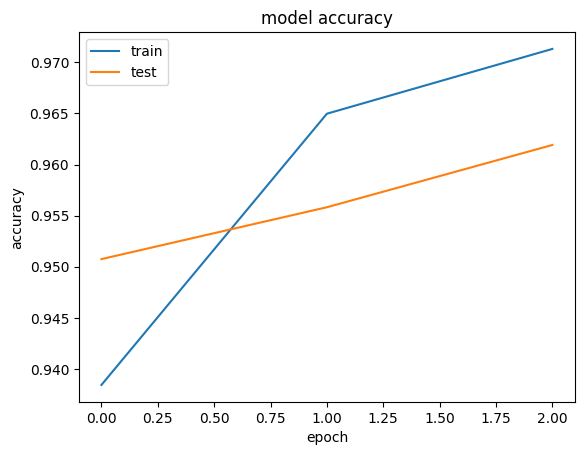

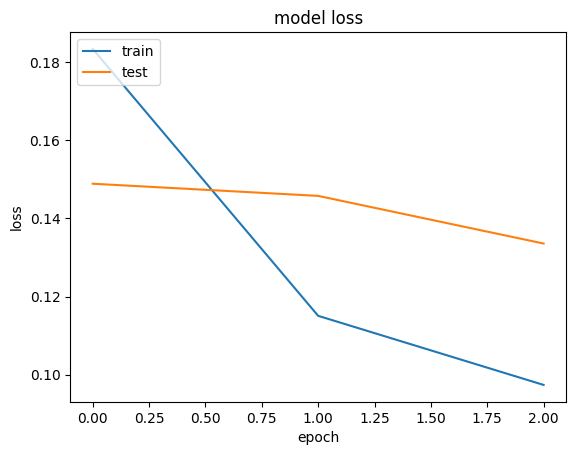

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_1 (Flatten)         (None, 725)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7260      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
755/755 [==========================

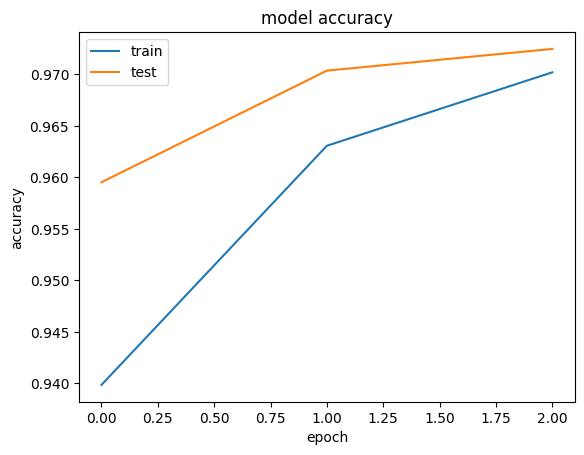

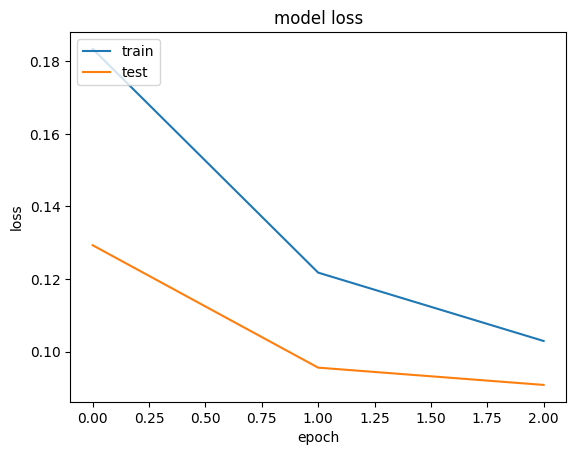

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_2 (Flatten)         (None, 725)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7260      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
754/754 [==========================

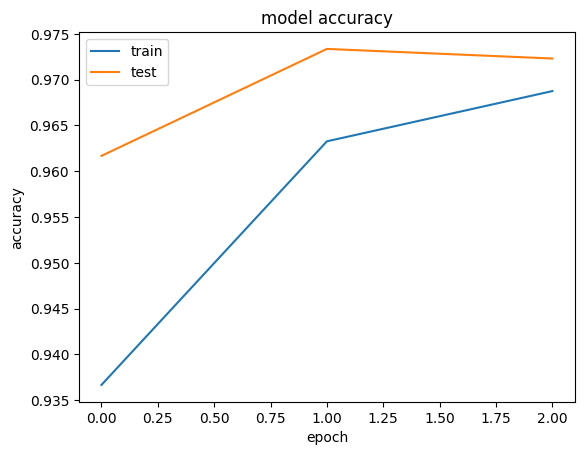

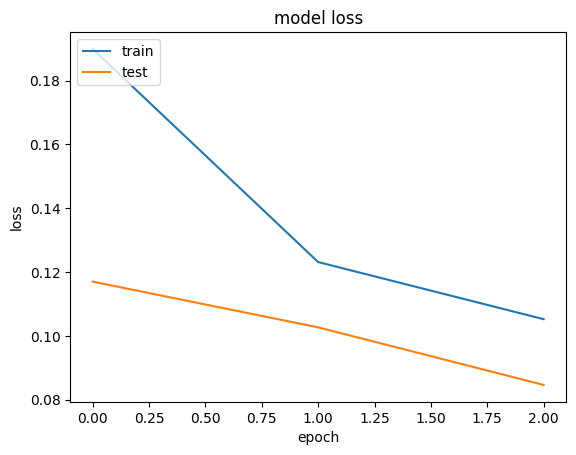

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_3 (Flatten)         (None, 725)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7260      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
759/759 [==========================

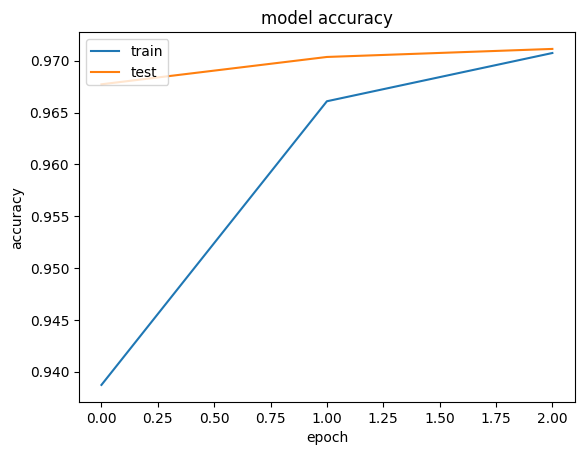

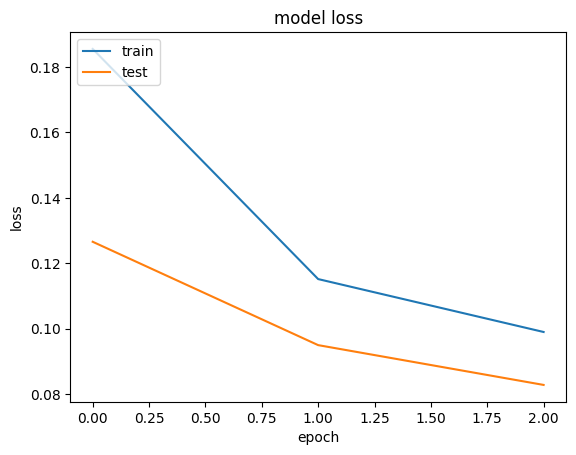

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_4 (Flatten)         (None, 725)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7260      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
746/746 [==========================

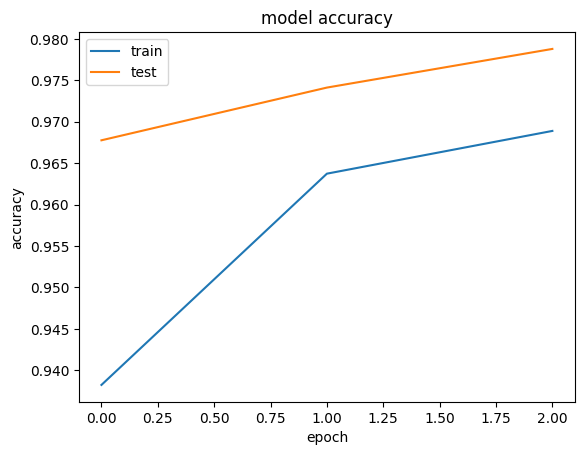

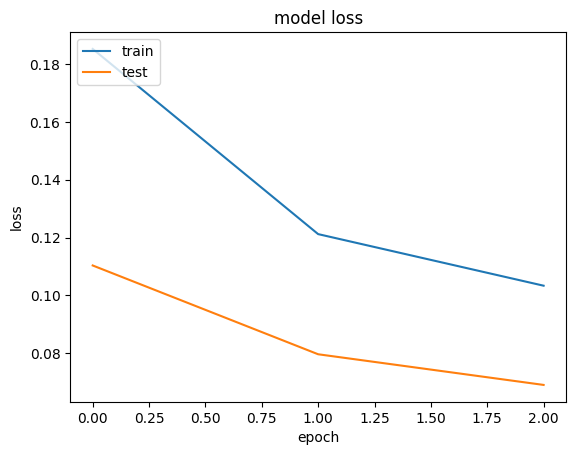

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_5 (Flatten)         (None, 725)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7260      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
728/728 [==========================

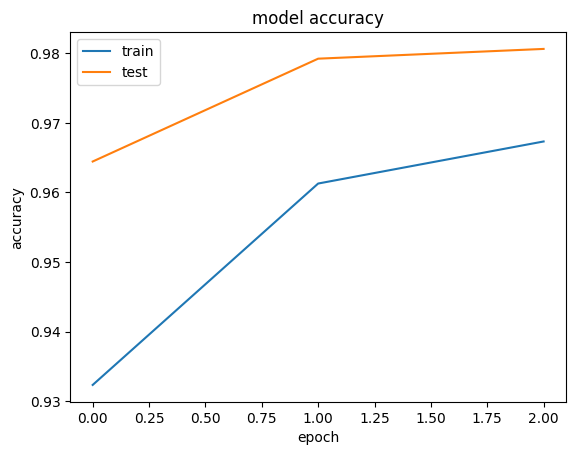

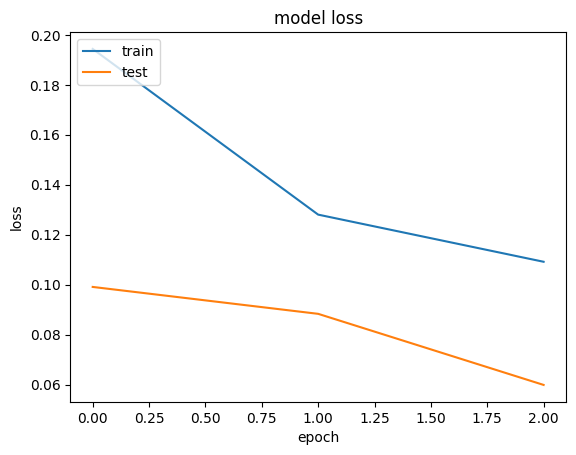

In [19]:
"""
DESCRIPTION:
This is only to be used to create a confusion matrix across all validation data folds using models trained on the 
correpsonding training data folds. Used to assess classification performance before training a final model on all the
data.

INPUT VARIABLES:
model_type:         [string ('SVM','LSTM')]; The model type that will be used to fit the data.
train_data_folds:   [dict (key: string (fold ID); Value: xarray (dimensions vary based on model type) > floats)];
                    Data across all training tasks per fold. Equal number of samples per class. PC features. Rearranged 
                    according to the type of model that will be trained.
train_labels_folds: [dict (key: string (fold ID); Value: xarray (samples,) > strings (labels))]; For each training fold,
                    label xarrays are concatenated in the sample dimension.
valid_data_folds:   [dict (key: string (fold ID); Value: xarray (dimensions vary based on model type) > floats)];
                    Data across all validation tasks per fold. Equal number of samples per class. PC features. 
                    Rearranged according to the type of model that will be trained.
valid_labels_folds: [dict (key: string (fold ID); Value: xarray (samples,) > strings (labels))]; For each validation
                    fold, label xarrays are concatenated in the sample dimension.
                         
OUTPUT VARIABLES:
fold_models: [dictionary (key: string (fold ID); Value: model)]; Models trained for each training fold.
"""
# COMPUTATION:

# Creating a model for each training fold.
fold_models = functions_pose_estimation_model_training.training_fold_models(model_type, train_data_folds,\
                                                                            train_labels_folds, valid_data_folds,\
                                                                            valid_labels_folds)


# EVALUATING MODEL ACCURACY

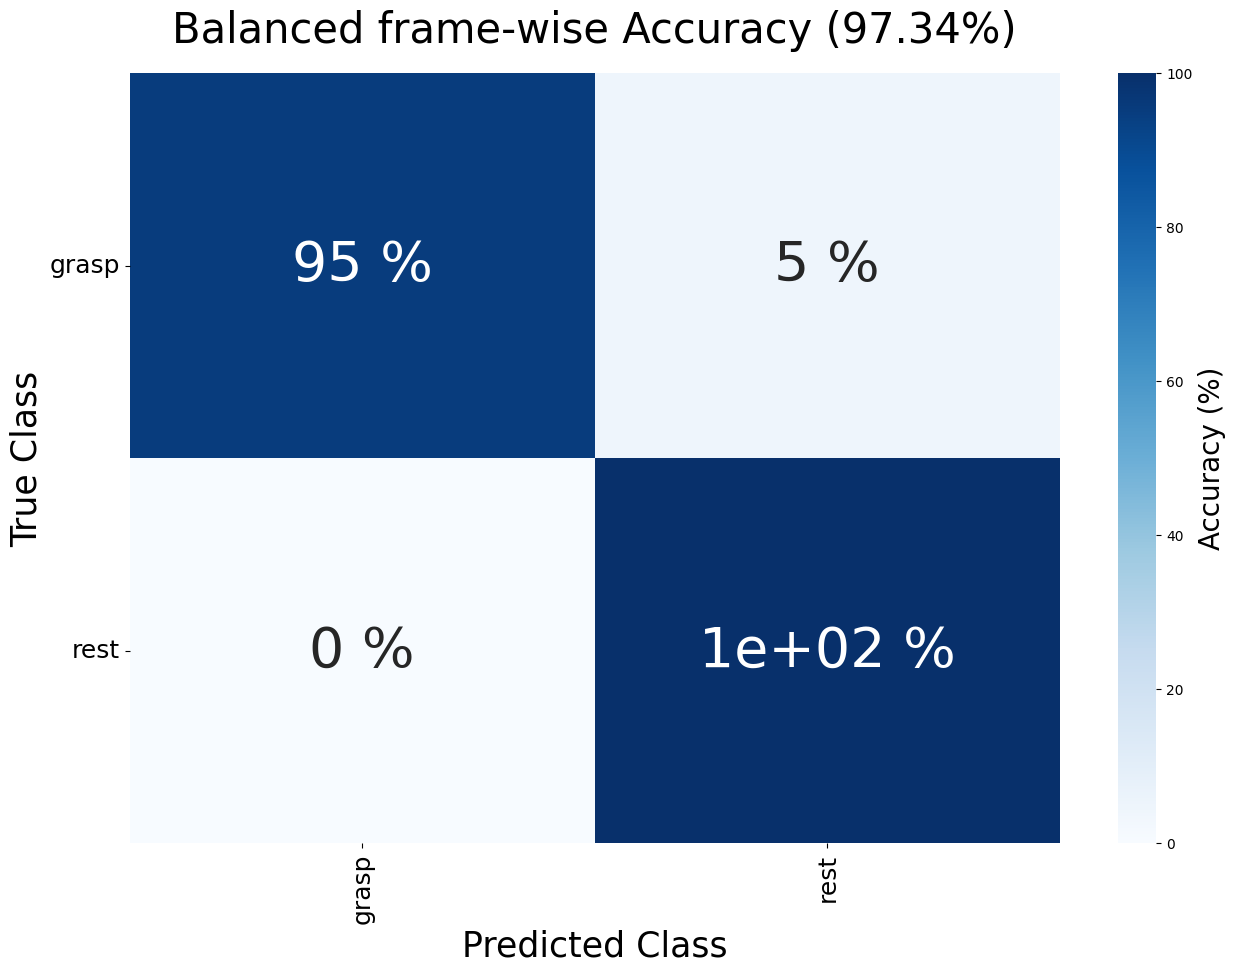

In [20]:
"""
DESCRIPTION:
Evaluating model accuracy by computing and displaying the confusion matrix of all predicted vs. true labels from all 
folds.

INPUT VARIABLES:
fold_models:        [dictionary (key: string (fold ID); Value: model)]; Models trained for each training fold.
valid_data_folds:   [dict (key: string (fold ID); Value: xarray (dimensions vary based on model type) > floats)];
                    Data across all validation tasks per fold. Equal number of samples per class. PC features. 
                    Rearranged according to the type of model that will be trained.
valid_labels_folds: [dict (key: string (fold ID); Value: xarray (samples,) > strings (labels))]; For each validation
                    fold, label xarrays are concatenated in the sample dimension.

GLOBAL PARAMETERS (in functions_model_training_visual_labeling.py):
model_classes:  [list > strings]; List of all the classes to be used in the classifier.

NECESSARY FUNCTIONS:
computing_predicted_labels
confusion_matrix_display
"""

# COMPUTATION:

# Computing and displaying the confusion matrix.
functions_pose_estimation_model_training.evaluating_model_accuracy(fold_models, valid_data_folds, valid_labels_folds)


# TRAINING FINAL MODEL


NUMBER OF PRINCIPAL COMPONENTS:  []

PERCENT VARIANCE EXPLAINED:  100
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 29, 25)            6800      
                                                                 
 flatten_6 (Flatten)         (None, 725)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7260      
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
Total params: 14,082
Trainable params: 14,082
Non-trainable params: 0
_____________________________________________

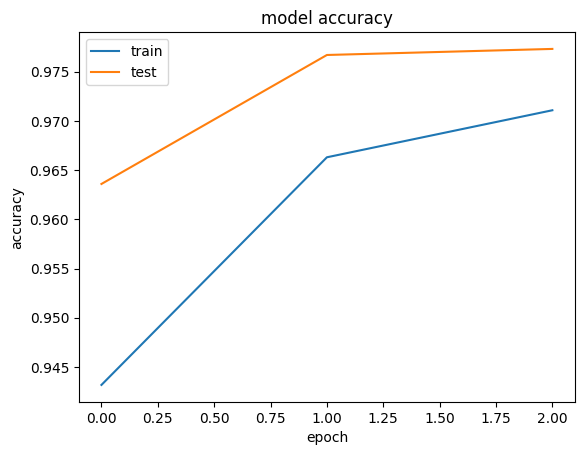

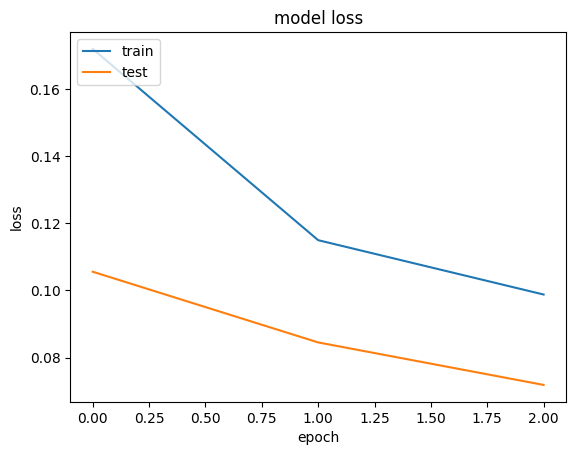

In [21]:
"""
DESCRIPTION:
Concatenating the data and labels from all tasks and training the final model on these concatenated arrays.

INPUT VARIABLES:
features_dict:   [dictionary (Key: string (task ID); Value: xarray (time history, features, samples) > floats)]; Array
                 of historical time features. Time samples reduced such that there are an equal number of features per
                 class.
labels_dict:     [dictionary (Key: string (task ID); Value: xarray (samples,)> strings (labels))]; For each sample in
                 each task, there exists a rest or movement-type label depending on the experimenter- specified onset
                 and offset of attempted movements. Time samples reduced such that there are an equal number of 
                 features per class.
model_type:      [string ('SVM','LSTM')]; The model type that will be used to fit the data.
n_pc_thr:        [int]; The number of principal components to which the user wishes to reduce the data set. Set to 
                 'None' if percent_var_thr is not 'None', or set to 'None' along with percent_var_thr if all of the 
                 variance will be used (no PC transform).
percent_var_thr: [float]; The percent variance which the user wishes to capture with the principal components. Will 
                 compute the number of principal components which capture this explained variance as close as possible,
                 but will not surpass it. Set to 'None' if n_pc_thr is not 'None', or set to 'None' along with n_pc_thr
                 if all of the variance will be used (no PC transform).
                   
NECESSARY FUNCTIONS:
computing_eigenvectors
mean_centering
mean_compute
model_training_lstm
pc_transform
rearranging_features
    
OUTPUT VARIABLES:
eigenvectors_final: [array (features, pc features) > floats]; Array in which columns consist of eigenvectors which
                    explain the variance of the data in descending order. 
final_model:        [classification model]; Model trained with data from all tasks.
model_classes:      [list > strings]; Class labels for the confusion matrix.
training_data_mean: [xarray (history, features) > floats ]; Mean power of each feature of only the 0th time shift. This
                    array is repeated for each historical time point.
"""

# COMPUTATION:

# Training the final model.
eigenvectors_final,\
final_model,\
model_classes,\
training_data_means = functions_pose_estimation_model_training.training_final_model(features_dict, labels_dict,\
                                                                                    model_type, n_pc_thr,\
                                                                                    percent_var_thr)


# SAVING PARAMETERS

In [22]:
"""
DESCRIPTION:
Saving all parameters related to the model in the experimenter-specified directory.
"""

# EXPERIMENTER INPUTS:
dir_model_info = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/HandMovementDetectors/'
model_name     = 'ModelTrainedOn_2023_01_05_until_2023_01_06'

"""
INPUT VARIABLES:
dir_model_info: [string]; Directory where the model and all relevant parameters will be saved.
final_model:    [classification model]; Model trained with data from all tasks.
model_name:     [string]; Name of the model under which all the parameters are saved.
model_type:     [string ('SVM','LSTM')]; The model type that will be used to fit the data.
"""


######################## MODEL INFO ########################
# Creating the dictionary of supplemental model information.
dict_model_supplemental = {'model_classes': model_classes, 'model_type': model_type}
filename_model          = 'Model_Info'
############################################################


################## PC TRANSFORMATION INFO ##################
# Creating the dictionary of all information necessary for dimensionality reduction via PCA.
dict_pctransform     = {'eigenvectors': eigenvectors_final ,'training_data_mean': training_data_means}
filename_pctransform = 'PC_Info'
############################################################


################# TIME HISTORY INFORMATION #################
# Creating the dictionary of relevant time history information and the corresponding filename.
dict_time_history = {'t_history': t_history}
filename_time_history = 'History_Info'
############################################################


# SAVING

# Computing the directory for the final model.
dir_model = dir_model_info + model_name + '/'

# Saving all parameters.
functions_pose_estimation_model_training.save_info(dict_time_history, dir_model, filename_time_history)
functions_pose_estimation_model_training.save_info(dict_model_supplemental, dir_model, filename_model)
functions_pose_estimation_model_training.save_info(dict_pctransform, dir_model, filename_pctransform)

# Saving the model.
functions_pose_estimation_model_training.save_model(dir_model, filename_model, final_model, model_type)


2024-05-01 20:35:04.110273: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/HandMovementDetectors/ModelTrainedOn_2023_01_05_until_2023_01_06/Model_Info/Model/assets


INFO:tensorflow:Assets written to: /mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/HandMovementDetectors/ModelTrainedOn_2023_01_05_until_2023_01_06/Model_Info/Model/assets
